In [2]:
# Import libraries
import os
import glob
import psycopg2
import pandas as pd
import numpy as np
from sql_queries import *

In [3]:
# Extablish connection
conn = psycopg2.connect("host=127.0.0.1 dbname=sparkifydb user=student password=student")
cur = conn.cursor()
conn.set_session(autocommit=True)

<h1> Get row counts for each table </h1>

In [9]:
# Find number of rows in each table
table_names = ['songplays', 'time', 'artists', 'users', 'songs']

for table in table_names: 
    
    try: 
        sql_string = "SELECT COUNT(*) FROM " + table + ";"
        cur.execute(sql_string)
    except psycopg2.Error as e: 
        print("Error: select *")
        print (e)

    print(table)
    row = cur.fetchone()
    while row:
       print(row)
       row = cur.fetchone()
    print("\n")

songplays
(6820,)


time
(6813,)


artists
(69,)


users
(96,)


songs
(71,)




In [10]:
6820 + 6813 + 69 + 96 + 71

13869

<h1> Get most popular browser </h1>

In [12]:
# Get the most popular user agant
sql_string = "SELECT DISTINCT user_agent FROM songplays;"
cur.execute(sql_string)
row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

('"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.103 Safari/537.36"',)
('"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.153 Safari/537.36"',)
('"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/537.75.14"',)
('"Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"',)
('Mozilla/5.0 (Macintosh; Intel Mac OS X 10.7; rv:31.0) Gecko/20100101 Firefox/31.0',)
('Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; rv:11.0) like Gecko',)
('"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.78.2 (KHTML, like Gecko) Version/7.0.6 Safari/537.78.2"',)
('Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; rv:31.0) Gecko/20100101 Firefox/31.0',)
('"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10) AppleWebKit/538.46 (KHTML, like Gecko) Version/8.0 Safari/538.46"',)
('"Mozilla/5.0 (Macintosh; Inte

From the user agents, these are the main browsers: Safari, Firefox, Chrome

In [15]:
# Get the popular user agant
sql_string = "SELECT COUNT(*) FROM songplays WHERE user_agent LIKE '%Safari%';"
cur.execute(sql_string)
row = cur.fetchone()
print("Safari users: ", row)

sql_string = "SELECT COUNT(*) FROM songplays WHERE user_agent LIKE '%Chrome%';"
cur.execute(sql_string)
row = cur.fetchone()
print("Chrome users: ", row)

sql_string = "SELECT COUNT(*) FROM songplays WHERE user_agent LIKE '%Firefox%';"
cur.execute(sql_string)
row = cur.fetchone()
print("Firefox users: ", row)

Safari users:  (5203,)
Chrome users:  (3896,)
Firefox users:  (1589,)


<h1> Get user gender breakdown</h1>

In [23]:
sql_string = "SELECT users.gender, COUNT(*)  FROM songplays JOIN users ON songplays.user_id = users.user_id GROUP BY users.gender"
cur.execute(sql_string)
row = cur.fetchone()
counter = 0
while row:
    print(row)
    row = cur.fetchone()
    counter += 1
    if counter == 5: break

('M', 1933)
('F', 4887)


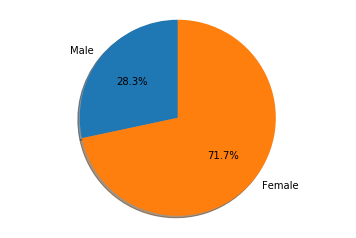

In [27]:
# Visualize using pie chart
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Male', 'Female']
sizes = [1933, 4887]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()